# ☛ Problem Statement :
<pre>Real estate transactions are quite opaque sometimes and it may be  difficult for a newbie to know the fair price of any given home.
Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it.
Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build
homes that fetch them more money.
It is expected to build a sale price prediction model that will aid the customers to find a fair price for their homes
and also help the sellers understand what factors are fetching more money for the houses.</pre>



# ≣ Variables in the Dataset :
       ✤ PRT_ID : Project ID (object)
       ✤ AREA : Area where the house is located (object)
       ✤ INT_SQFT : Total area of the house in square-feet (int)
       ✤ DATE_SALE : Date on which the house got sold (object)
       ✤ DIST_MAINROAD : Distance from the house to the mainroad -in meters(int)
       ✤ N_BEDROOM : Number of Bedrooms (float)
       ✤ N_BATHROOM : Number of Bathrooms (float)
       ✤ N_ROOM : Number of Rooms (int)
       ✤ SALE_COND : Sale Conditions (object)
       ✤ PARK_FACIL : Parking Facility (object)
       ✤ DATE_BUILD : Date on which the house was built (object)
       ✤ BUILD_TYPE : Type of the house (object)
       ✤ UTILITY_AVAIL : Utilities available for the owner of the house (object)
       ✤ STREET : Street where the house is located (object)
       ✤ MZZONE : Chennai Regions are divided into multiple zones, MZZONE is nothing but the zone where the house belongs to (object)
       ✤ QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL : Masked Data (float)
       ✤ REG_FEE : Registration Fees (int)
       ✤ COMMIS : Commission (int)
       ✤ SALE_PRICE : Price at which the house got sold (int)

## Importing necessary dependencies

In [1]:
!pip install seaborn==0.11

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [2]:
# for data reading and data manipulation
import numpy as np
import pandas as pd
import statistics as st

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for model creation and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [3]:
# reading data from a .csv file to a Pandas DataFrame
df = pd.read_csv('chennai house sale prediction.csv')
pd.set_option('display.max_columns',None)
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
df.shape

(7109, 22)

In [5]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

<pre>As the names of all the columns in the DataFrame are in CAPS, I would like to rename all the columns to it's lower_case form,
So later it would be efficient for me to work with the dataframe. For this I will create a function 'rename_cols'.</pre>

In [6]:
df.columns = [column.lower() for column in df.columns]

In [7]:
df.columns

Index(['prt_id', 'area', 'int_sqft', 'date_sale', 'dist_mainroad', 'n_bedroom',
       'n_bathroom', 'n_room', 'sale_cond', 'park_facil', 'date_build',
       'buildtype', 'utility_avail', 'street', 'mzzone', 'qs_rooms',
       'qs_bathroom', 'qs_bedroom', 'qs_overall', 'reg_fee', 'commis',
       'sales_price'],
      dtype='object')

In [8]:
df.head()

,prt_id,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,reg_fee,commis,sales_price
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [9]:
print(f'➤ The DataFrame(df) contains {df.shape[0]} rows and {df.shape[1]} columns.')

➤ The DataFrame(df) contains 7109 rows and 22 columns.


<pre>Here I can clearly sense that there are 3 as of such columns which in no way can contribute for the price prediction of house :
1.) prt_id
2.) reg_fee
3.) commis

Hence it is better to drop these 3 columns before further analysis.</pre>

In [10]:
df.drop(columns = ['prt_id','reg_fee','commis'],inplace=True)

In [11]:
print(f'➤ Now the shape of the Dataframe is {df.shape[0]} rows and {df.shape[1]} columns.')

➤ Now the shape of the Dataframe is 7109 rows and 19 columns.


In [12]:
df.head(2)

,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770


## Checking and Handling Missing Values
    Checking for missing values

In [13]:
# looking for the amount of null data in the pandas dataframe
df.isnull().sum()

area              0
int_sqft          0
date_sale         0
dist_mainroad     0
n_bedroom         1
n_bathroom        5
n_room            0
sale_cond         0
park_facil        0
date_build        0
buildtype         0
utility_avail     0
street            0
mzzone            0
qs_rooms          0
qs_bathroom       0
qs_bedroom        0
qs_overall       48
sales_price       0
dtype: int64

In [14]:
# looking for the percentage of null data in the dataframe
pd.DataFrame(df.isna().mean()*100).T

,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price
0,0.0,0.0,0.0,0.0,0.014067,0.070333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6752,0.0


    Handling missing values.

<pre>The percentage of missing values for columns with missing values is way less then 5%,
Therefore we can deal with them rather than losing our data.</pre>

<pre>➺ As there is only 1 missing value in <i>n_bedroom</i>, it can be replaced with Mode.
➺ There are 5 missing values in <i>n_bathroom</i>, it  can be replaced with the median of that particular column.
➺ The columns <i>qs_overall</i> is a special case as the data in that column is masked and the data is in floating point number,
it is good to replace it with mean.</pre>


In [15]:
st.mean(df['qs_overall']), st.median(df['qs_overall'])

(nan, 4.47)

In [16]:
# filling the missing values using statistical techniques
df = df.fillna({'n_bedroom': st.mode(df['n_bedroom']),
                'n_bathroom': st.mode(df['n_bathroom']),
                'qs_overall': df['qs_overall'].mean()})

In [17]:
# cross  checking  for  null  values
df.isnull().sum()

area             0
int_sqft         0
date_sale        0
dist_mainroad    0
n_bedroom        0
n_bathroom       0
n_room           0
sale_cond        0
park_facil       0
date_build       0
buildtype        0
utility_avail    0
street           0
mzzone           0
qs_rooms         0
qs_bathroom      0
qs_bedroom       0
qs_overall       0
sales_price      0
dtype: int64

## Data Type Correction
<pre>It is observed that the data-type of certain columns are not exactly the right data-type suitable for those corresponding columns:
⃰ The data type of columns <i>n_bedroom</i> and <i>n_bathroom</i> are unnecessarily given as 'float' but it is better to change them into 'int' for better computation.
⃰ The data type of columns <i>date_sale</i> and <i>date_build</i> are as 'strings' but should be of 'datetime'.



In [18]:
df.dtypes

area              object
int_sqft           int64
date_sale         object
dist_mainroad      int64
n_bedroom        float64
n_bathroom       float64
n_room             int64
sale_cond         object
park_facil        object
date_build        object
buildtype         object
utility_avail     object
street            object
mzzone            object
qs_rooms         float64
qs_bathroom      float64
qs_bedroom       float64
qs_overall       float64
sales_price        int64
dtype: object

In [21]:
# correcting data type of columns n_bedroom and n_bathroom
df['n_bedroom'] = df['n_bedroom'].astype(int)
df['n_bathroom'] = df['n_bathroom'].astype(int)

#correcting data type of columns date_sale and date_build
import pandas as pd

# Assuming df is your DataFrame
df['date_sale'] = pd.to_datetime(df['date_sale'], format='%d-%m-%Y')
df['date_build'] = pd.to_datetime(df['date_build'], format='%d-%m-%Y')

#df['date_sale'] = pd.to_datetime(df['date_sale'])
#df['date_build'] = pd.to_datetime(df['date_build'])

In [22]:
from datetime import date, datetime, timedelta

todayData = datetime(2023, 2, 18,4,48,0)
todayData.weekday()

5

In [23]:
# cross-checking the data-types of all the columns in the dataframe
df.dtypes

area                     object
int_sqft                  int64
date_sale        datetime64[ns]
dist_mainroad             int64
n_bedroom                 int64
n_bathroom                int64
n_room                    int64
sale_cond                object
park_facil               object
date_build       datetime64[ns]
buildtype                object
utility_avail            object
street                   object
mzzone                   object
qs_rooms                float64
qs_bathroom             float64
qs_bedroom              float64
qs_overall              float64
sales_price               int64
dtype: object

## Creation of a new column "house_age":
There are 2 columns named 'date_sale' and 'date_build' which represents date on which the house got sold and the date on which the house was built respectively. Both of this columns do not make any sense as of such but there is one thing that can be yielded using both of this columns and that is age of the house, how old the house is can be a good decisive factor for determining the "sales_price". This new column's value will be in *no_of_years*.

After this we can drop columns *date_sale* and *date_build*.

<pre> house_age = date_sale - date_build</pre>

In [24]:
df['house_age'] = df['date_sale'].dt.year - df['date_build'].dt.year

In [25]:
df['house_age']

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: house_age, Length: 7109, dtype: int32

In [26]:
df.drop(columns = ['date_sale','date_build'],inplace=True)

In [27]:
df.head()

,area,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price,house_age
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


In [28]:
df.shape

(7109, 18)

In [29]:
# viewing how many columns in the dataframe fall in the object and the numeric data types
pd.DataFrame(df.dtypes.value_counts()).T

,object,int64,float64,int32
count,7,6,4,1


In [30]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['int_sqft',
 'dist_mainroad',
 'n_bedroom',
 'n_bathroom',
 'n_room',
 'sales_price']

    From the above results of the code cell it seems that there is nothing to worry about the int64 cols no changes needed.

In [31]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['qs_rooms', 'qs_bathroom', 'qs_bedroom', 'qs_overall']

    From the above results of columns with floating point number there seems nothing wrong, No changes needed.

In [32]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['area',
 'sale_cond',
 'park_facil',
 'buildtype',
 'utility_avail',
 'street',
 'mzzone']

<pre>As the number of object data type columns is more it is important to know how each object data column is divided into categories.
Let's explore all the categorical columns and know into how many categories they are divided into.</pre>

In [33]:
for i in object_data_cols:
  print(f'Column "{i}" is divided into "{len(df[i].value_counts())}" categories.')

Column "area" is divided into "17" categories.
Column "sale_cond" is divided into "9" categories.
Column "park_facil" is divided into "3" categories.
Column "buildtype" is divided into "5" categories.
Column "utility_avail" is divided into "5" categories.
Column "street" is divided into "5" categories.
Column "mzzone" is divided into "6" categories.


The categorical columns are having too many categories, seems like it is needed to analyze all of them one by one.

In [34]:
# for column "area"
df['area'].value_counts()

area
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: count, dtype: int64

<pre>For the column "area" there are many spelling mistakes which is the resulting factor for soo many categories.
Let's fix 'em </pre>

In [35]:
df['area'] = df['area'].replace({'Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet','TNagar':'T Nagar','Karapakam':'Karapakkam','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar','Velchery':'Velachery','Adyr':'Adyar','KKNagar':'KK Nagar'})

In [36]:
df['area'].value_counts()

area
Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: count, dtype: int64

In [37]:
# for column "sale_cond"
df['sale_cond'].value_counts()

sale_cond
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: count, dtype: int64

<pre>Even here we have the same spelling mistakes.
Let's fix 'em up!</pre>

In [38]:
df['sale_cond'] = df['sale_cond'].replace({'Adj Land':'AdjLand','Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial'})

In [39]:
df['sale_cond'].value_counts()

sale_cond
AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: count, dtype: int64

In [40]:
# for column "park_facil"
df['park_facil'].value_counts()

park_facil
Yes    3587
No     3520
Noo       2
Name: count, dtype: int64

<pre> Same Spelling Mistakes!!!!!</pre>

In [41]:
df['park_facil'] = df['park_facil'].replace({'Noo':'No'})

In [42]:
df['park_facil'].value_counts()

park_facil
Yes    3587
No     3522
Name: count, dtype: int64

In [43]:
# for column "buildtype"
df['buildtype'].value_counts()

buildtype
House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: count, dtype: int64

<pre>AGHHH!!! Same spelling mistakes!

In [44]:
df['buildtype'] = df['buildtype'].replace({'Comercial':'Commercial','Other':'Others'})

In [45]:
df['buildtype'].value_counts()

buildtype
House         2444
Others        2336
Commercial    2329
Name: count, dtype: int64

In [46]:
# for column "utility_avail"
df['utility_avail'].value_counts()

utility_avail
AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: count, dtype: int64

<pre> Again its the same thing here,SPELLING MISTAKES!!! </pre>

In [47]:
df['utility_avail'] = df['utility_avail'].replace(['NoSewr ','NoSeWa','All Pub'],['No Sewer','No Sewer','AllPub'])

In [48]:
df['utility_avail'].value_counts()

utility_avail
No Sewer    3700
AllPub      1887
ELO         1522
Name: count, dtype: int64

In [49]:
# for column "street"
df['street'].value_counts()

street
Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: count, dtype: int64

<pre> Spelling Mistake Again! </pre>

In [50]:
df['street'] = df['street'].replace({'Pavd':'Paved','NoAccess':'No Access'})

In [51]:
df['street'].value_counts()

street
Paved        2572
Gravel       2520
No Access    2017
Name: count, dtype: int64

In [52]:
# for column "mzzone"
df['mzzone'].value_counts()

mzzone
RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: count, dtype: int64

<pre> Here in column "mzzone" there is no such spelling error, everything here is okay!</pre>

In [53]:
df = df.drop_duplicates()

In [54]:
df.shape

(7109, 18)

## Data Visualization.

In [55]:
df['area'].value_counts().index[::-1]

Index(['T Nagar', 'Adyar', 'Anna Nagar', 'Velachery', 'KK Nagar', 'Karapakkam',
       'Chrompet'],
      dtype='object', name='area')

In [56]:
df['area'].value_counts().index[::-1]

Index(['T Nagar', 'Adyar', 'Anna Nagar', 'Velachery', 'KK Nagar', 'Karapakkam',
       'Chrompet'],
      dtype='object', name='area')

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

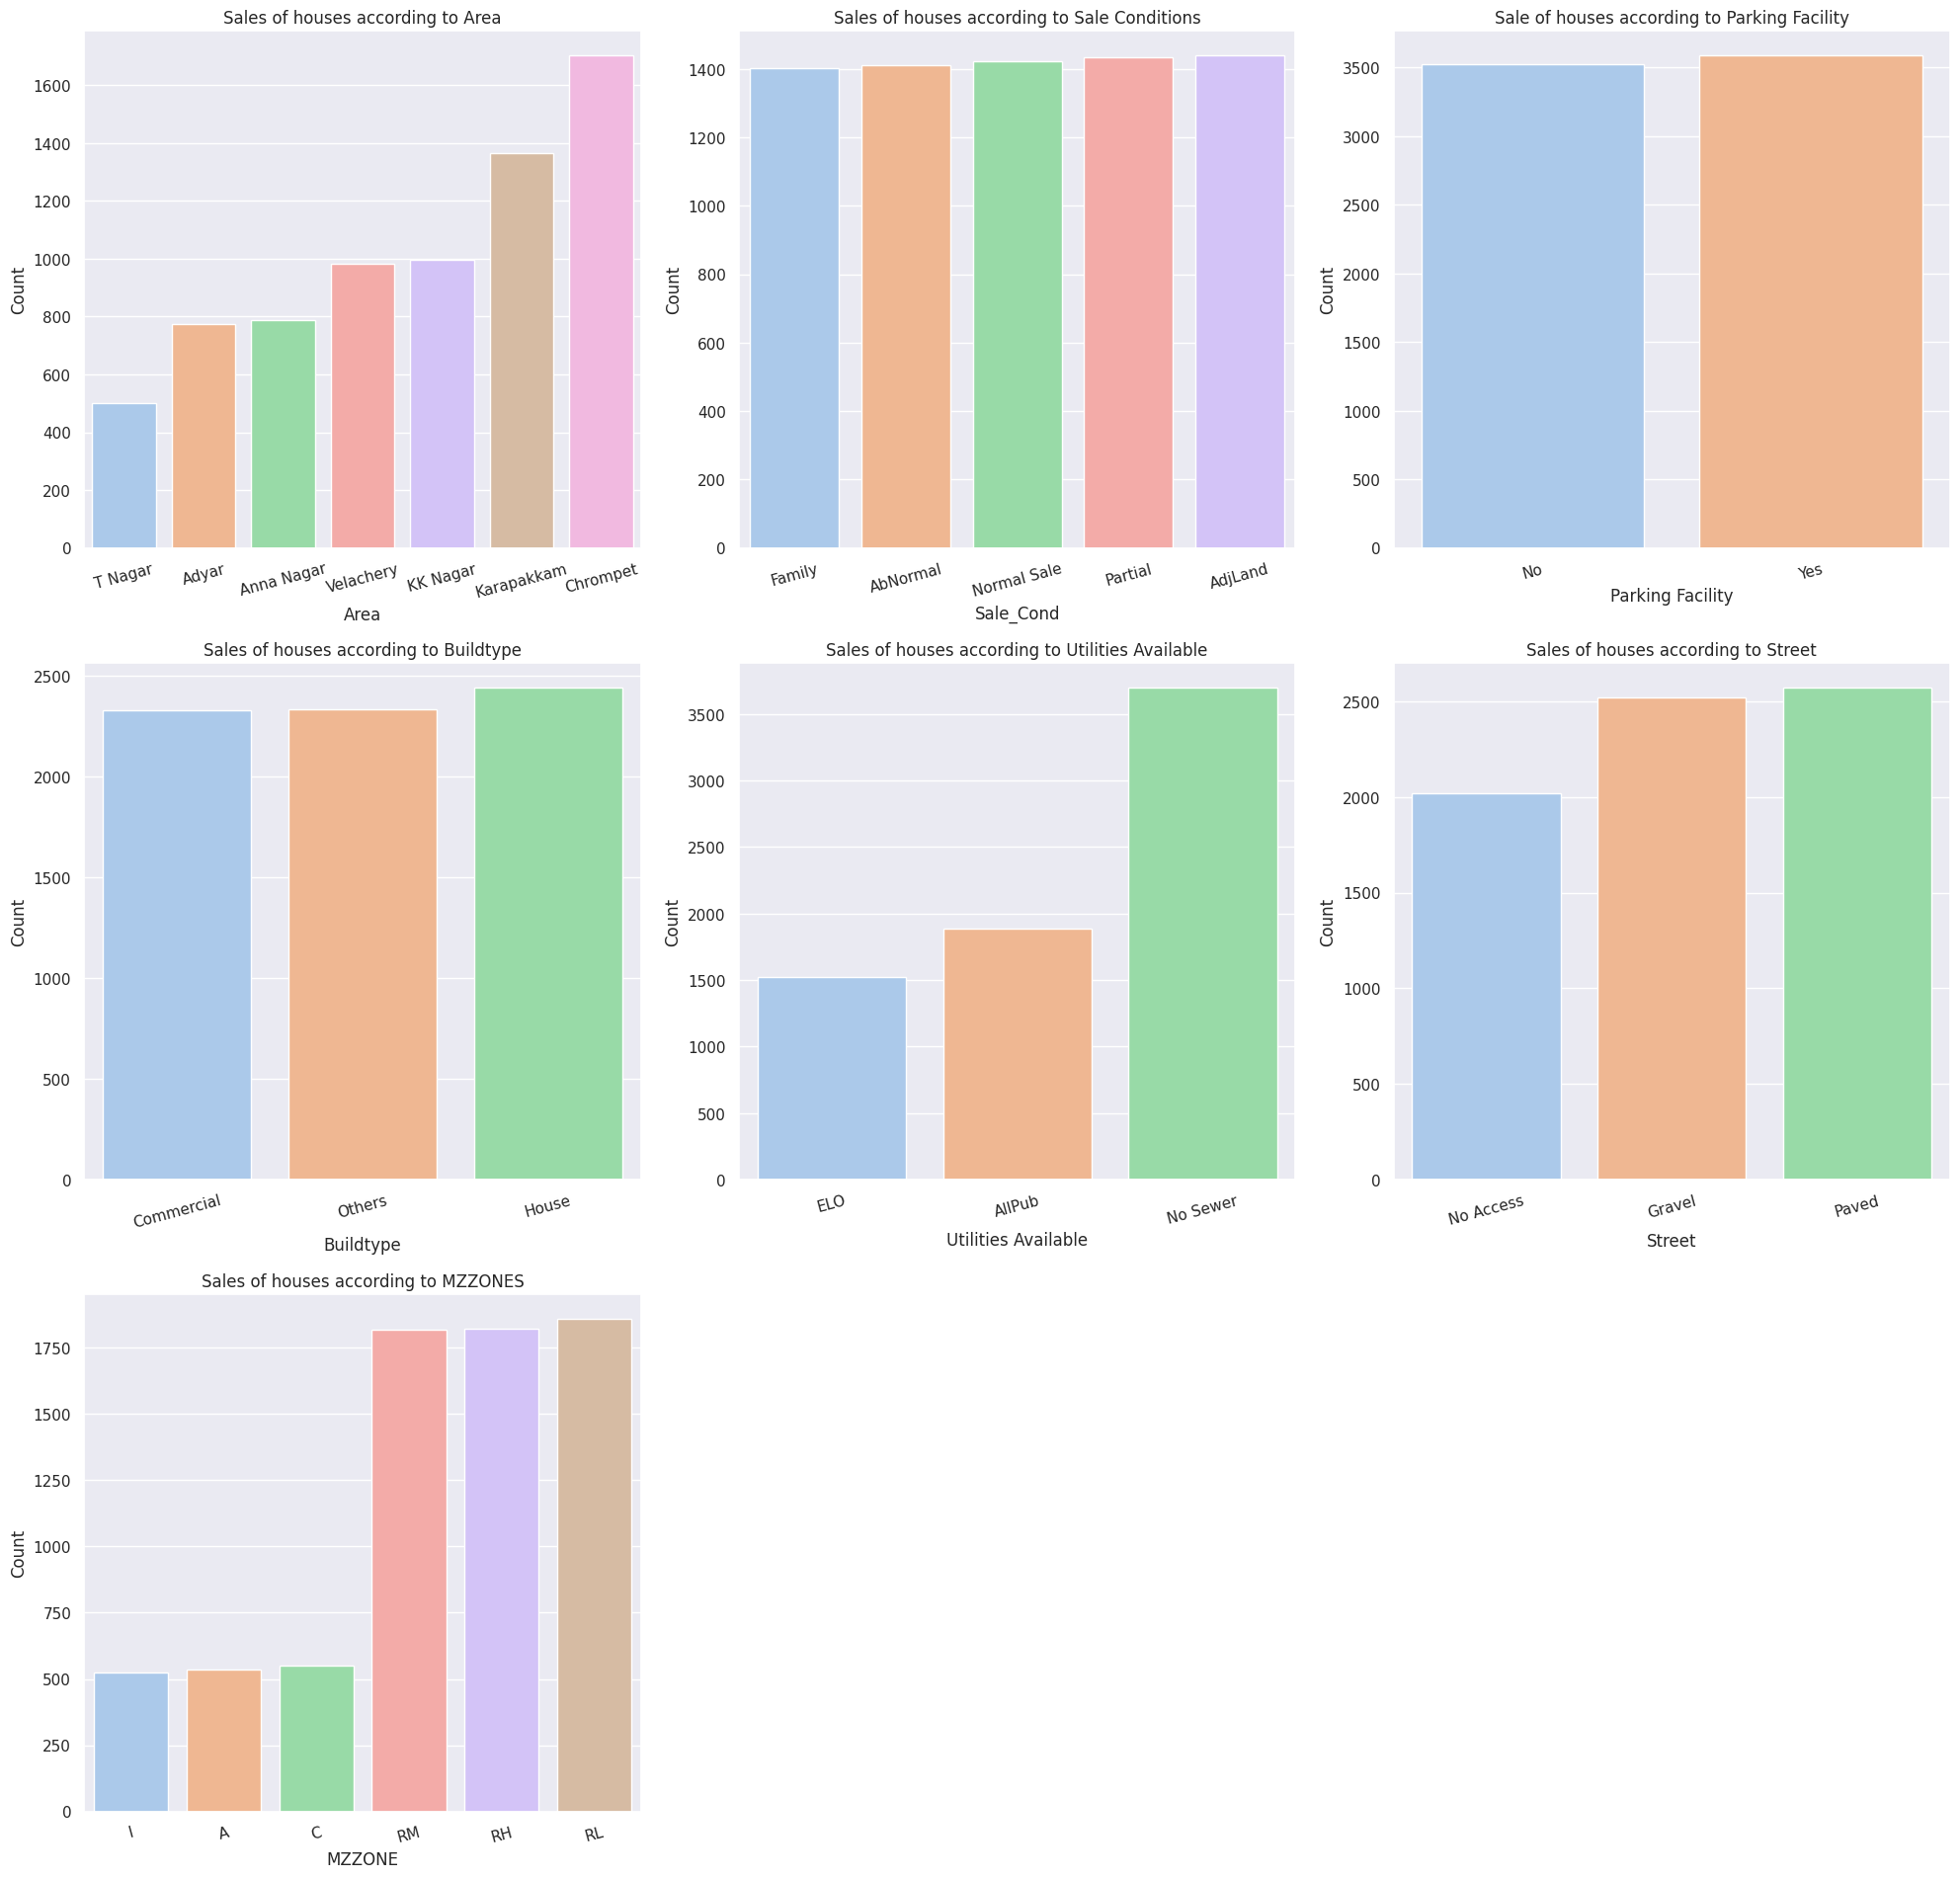

In [57]:
#plotting count plots for all the categorical columns
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(20,25))
plt.subplot(431)
sns.countplot(df['area'],order=df['area'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Sales of houses according to Area')

plt.subplot(432)
sns.countplot(df['sale_cond'],order=df['sale_cond'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Sale_Cond')
plt.ylabel('Count')
plt.title('Sales of houses according to Sale Conditions')

plt.subplot(433)
sns.countplot(df['park_facil'],order=df['park_facil'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Parking Facility')
plt.ylabel('Count')
plt.title('Sale of houses according to Parking Facility')

plt.subplot(434)
sns.countplot(df['buildtype'],order=df['buildtype'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Buildtype')
plt.ylabel('Count')
plt.title('Sales of houses according to Buildtype')

plt.subplot(435)
sns.countplot(df['utility_avail'],order=df['utility_avail'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Utilities Available')
plt.ylabel('Count')
plt.title('Sales of houses according to Utilities Available')

plt.subplot(436)
sns.countplot(df['street'],order=df['street'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Street')
plt.ylabel('Count')
plt.title('Sales of houses according to Street')

plt.subplot(437)
sns.countplot(df['mzzone'],order=df['mzzone'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('MZZONE')
plt.ylabel('Count')
plt.title('Sales of houses according to MZZONES')

plt.tight_layout()

<pre>Interpretations :
 1.) According to the column "area" the highest number of houses sold were in the area "Chrompet".
 2.) According to the column "sale_cond", no such category has a strong influence on sales of house.
 3.) According to the column "park_facil", houses with parking facilities are slightly sold more.
 4.) According to the column "buildtype", houses used for living are sold more then using it as commercial or other spaces.
 5.) According to the column "utility_avail", houses with No Sewer are most sold.
 6.) According to the column "street", paved street and gravel street are more sold compared to houses with no access to street.
 7.) According to the column "mzzone", Zones such as RL, RH, RM are the zones where the most number of houses got sold.</pre>

    Plotting barplots for Categorical Columns vs Mean Sales Price.

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Area vs Mean_Sales_Price')

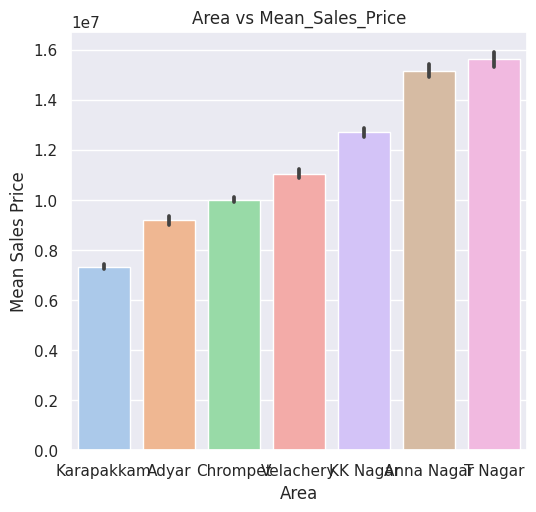

In [58]:
plt.figure(figsize=(20,25))

plt.subplot(431)
sns.barplot(df['area'],df['sales_price'], order = df.groupby('area')['sales_price'].mean().reset_index().sort_values('sales_price')['area'])
plt.xlabel('Area')
plt.ylabel('Mean Sales Price')
plt.title('Area vs Mean_Sales_Price')

In [59]:
#orders for all the barplots in ascending order
area_order = df.groupby('area')['sales_price'].mean().reset_index().sort_values('sales_price')['area']
sale_cond_order = df.groupby('sale_cond')['sales_price'].mean().reset_index().sort_values('sales_price')['sale_cond']
park_facil_order = df.groupby('park_facil')['sales_price'].mean().reset_index().sort_values('sales_price')['park_facil']
buildtype_order = df.groupby('buildtype')['sales_price'].mean().reset_index().sort_values('sales_price')['buildtype']
utility_avail_order = df.groupby('utility_avail')['sales_price'].mean().reset_index().sort_values('sales_price')['utility_avail']
street_order = df.groupby('street')['sales_price'].mean().reset_index().sort_values('sales_price')['street']
mzzone_order = df.groupby('mzzone')['sales_price'].mean().reset_index().sort_values('sales_price')['mzzone']

In [60]:
df.groupby('area')['sales_price'].mean().reset_index().sort_values('sales_price')['area'].values

array(['Karapakkam', 'Adyar', 'Chrompet', 'Velachery', 'KK Nagar',
       'Anna Nagar', 'T Nagar'], dtype=object)

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-

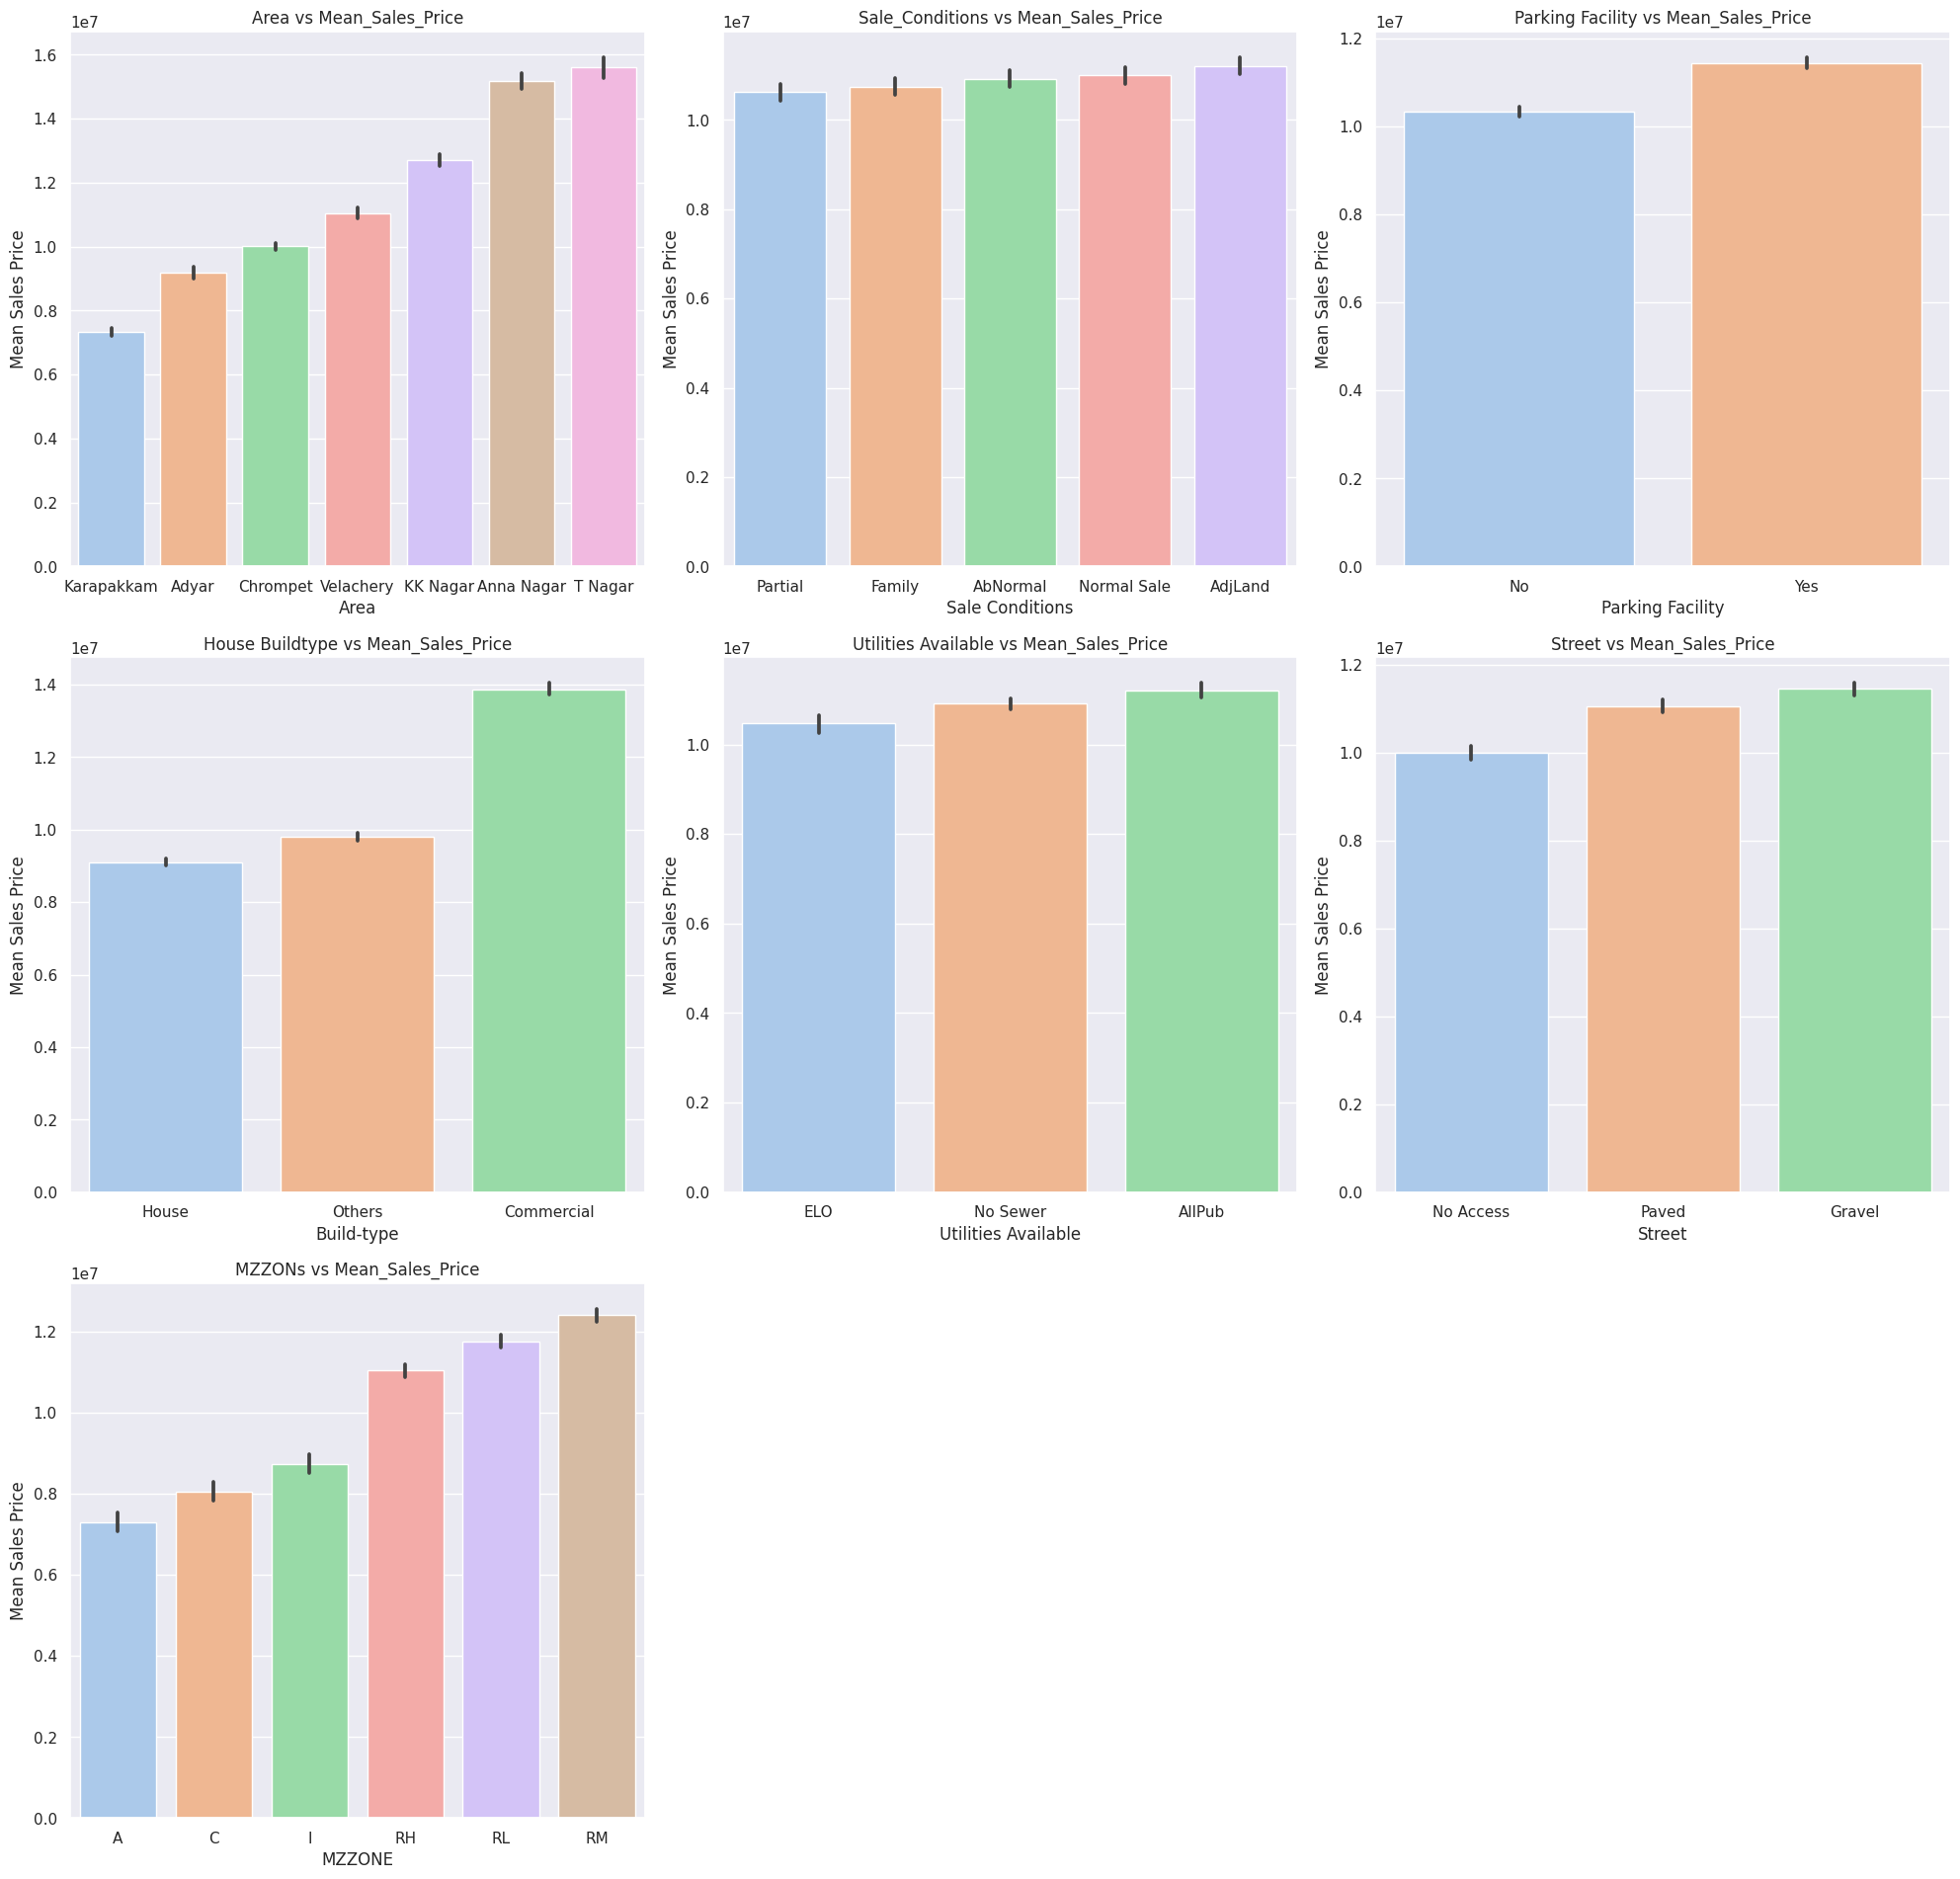

In [61]:
#for categorical columns
plt.figure(figsize=(20,25))

plt.subplot(431)
sns.barplot(df['area'],df['sales_price'], order = area_order)
plt.xlabel('Area')
plt.ylabel('Mean Sales Price')
plt.title('Area vs Mean_Sales_Price')

plt.subplot(432)
sns.barplot(df['sale_cond'],df['sales_price'],order=sale_cond_order)
plt.xlabel('Sale Conditions')
plt.ylabel('Mean Sales Price')
plt.title('Sale_Conditions vs Mean_Sales_Price')

plt.subplot(433)
sns.barplot(df['park_facil'],df['sales_price'],order=park_facil_order)
plt.xlabel('Parking Facility')
plt.ylabel('Mean Sales Price')
plt.title('Parking Facility vs Mean_Sales_Price')

plt.subplot(434)
sns.barplot(df['buildtype'],df['sales_price'],order=buildtype_order)
plt.xlabel('Build-type')
plt.ylabel('Mean Sales Price')
plt.title('House Buildtype vs Mean_Sales_Price')

plt.subplot(435)
sns.barplot(df['utility_avail'],df['sales_price'],order=utility_avail_order)
plt.xlabel('Utilities Available')
plt.ylabel('Mean Sales Price')
plt.title('Utilities Available vs Mean_Sales_Price')

plt.subplot(436)
sns.barplot(df['street'],df['sales_price'],order=street_order)
plt.xlabel('Street')
plt.ylabel('Mean Sales Price')
plt.title('Street vs Mean_Sales_Price')

plt.subplot(437)
sns.barplot(df['mzzone'],df['sales_price'],order=mzzone_order)
plt.xlabel('MZZONE')
plt.ylabel('Mean Sales Price')
plt.title('MZZONs vs Mean_Sales_Price')

plt.tight_layout()

<pre>Interpretations :
From the above data visualization it can be understood that the categorical columns do have linear realtionship with the
target variable ("sales_price" here).
So we have to use Ordinal Encoding to Encode all these categorical columns.</pre>

    Plotting line plots for integer column vs Sales Price column.

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-

Text(0.5, 1.0, 'House Age vs Sales_Price')

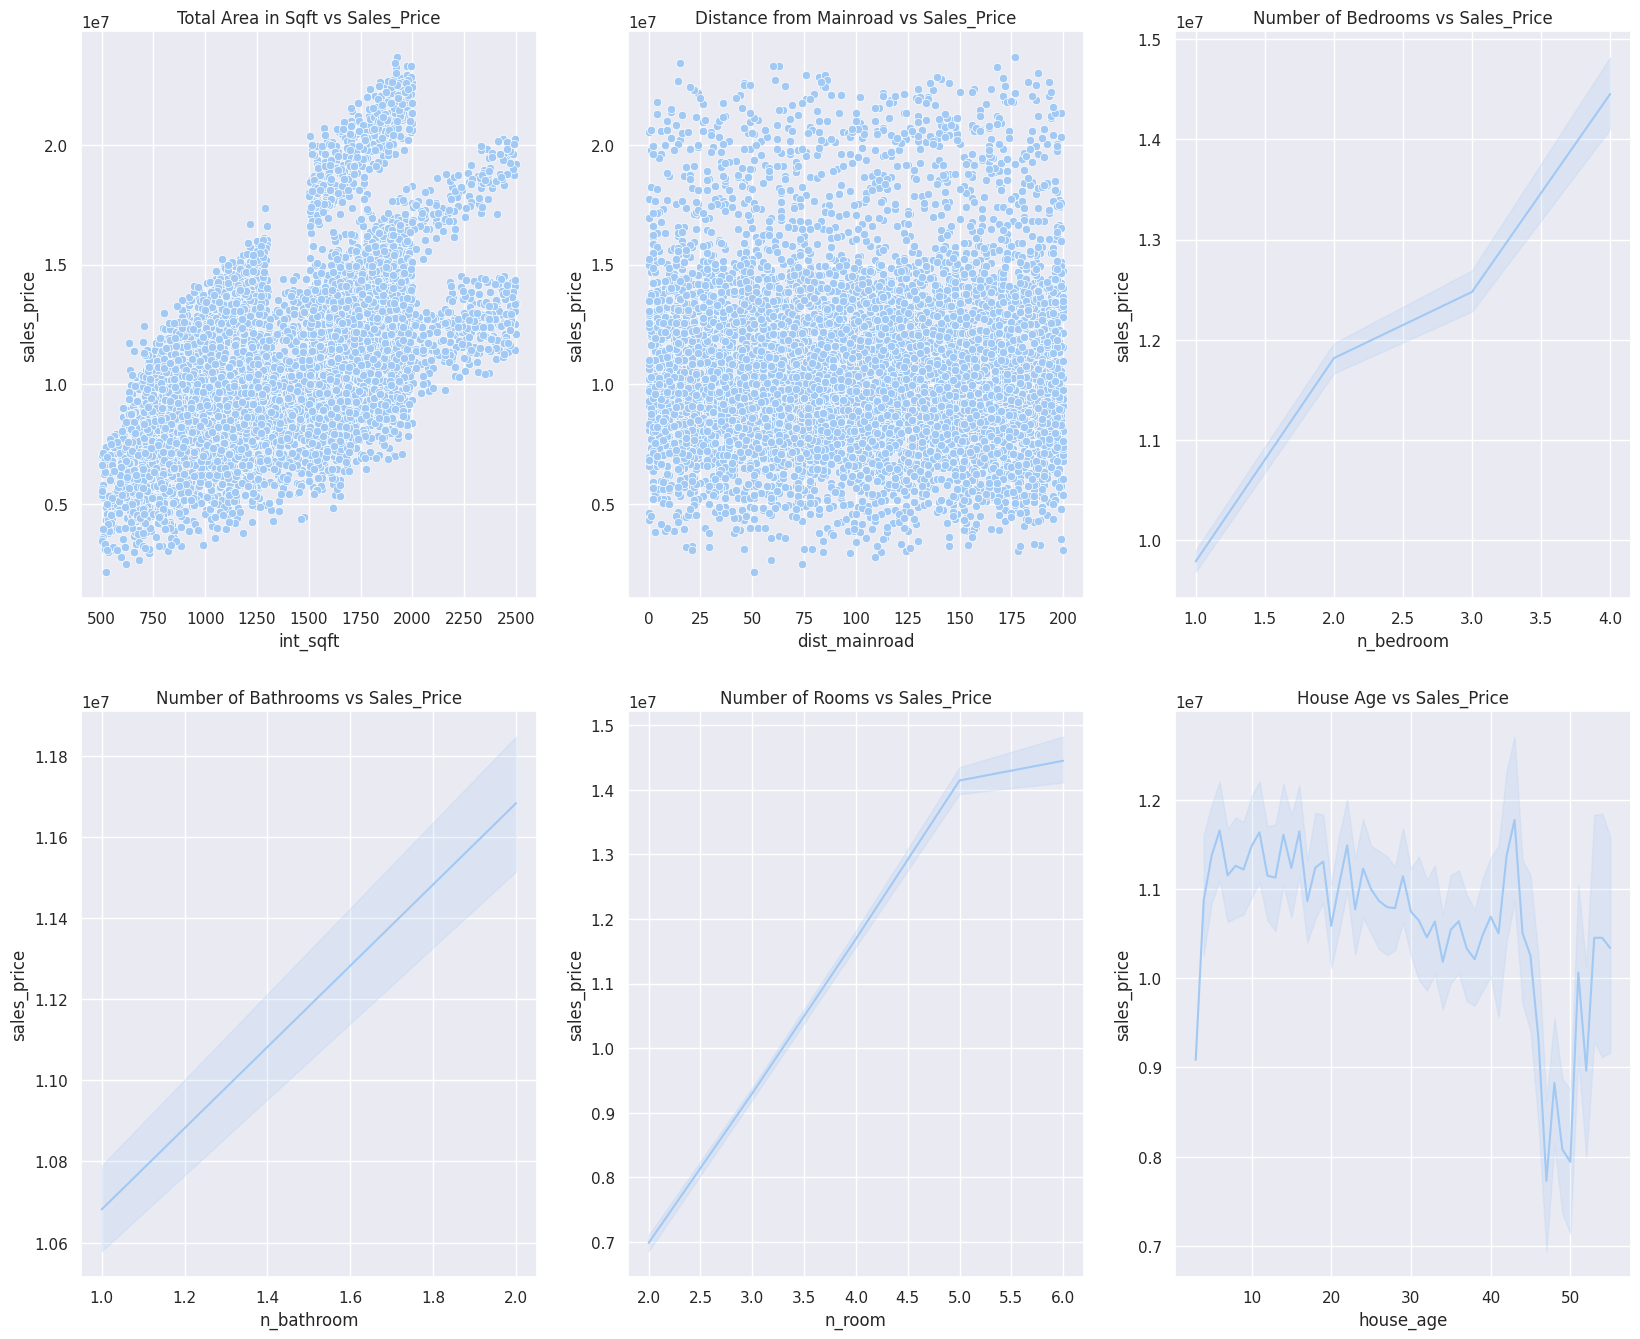

In [62]:
plt.figure(figsize=(20,25))
plt.subplot(331)
sns.scatterplot(df['int_sqft'],df['sales_price'])
plt.title('Total Area in Sqft vs Sales_Price')
plt.subplot(332)
sns.scatterplot(df['dist_mainroad'],df['sales_price'])
plt.title('Distance from Mainroad vs Sales_Price')
plt.subplot(333)
sns.lineplot(df['n_bedroom'],df['sales_price'])
plt.title('Number of Bedrooms vs Sales_Price')
plt.subplot(334)
sns.lineplot(df['n_bathroom'],df['sales_price'])
plt.title('Number of Bathrooms vs Sales_Price')
plt.subplot(335)
sns.lineplot(df['n_room'],df['sales_price'])
plt.title('Number of Rooms vs Sales_Price')
plt.subplot(336)
sns.lineplot(df['house_age'],df['sales_price'])
plt.title('House Age vs Sales_Price')

<pre>Interpretations :

For columns 'int_sqft','n_bedroom,'n_bathroom,'n_room' there is a clear Linear Relationship with the 'Sales_Price' column.

For column 'dist_mainroad' the distribution is uniform, no such linear relationship is discovered here.

For column 'house_age' we can see a hybrid kinda behaviour. For house ages 10 to 40 the sales_price drops a bit,
but from 40 to ~43 house prices rises and then again falls from ~43 - 50 and again it rises from 50-...

    Plotting scatter plots for masked data vs the sales_price column

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-

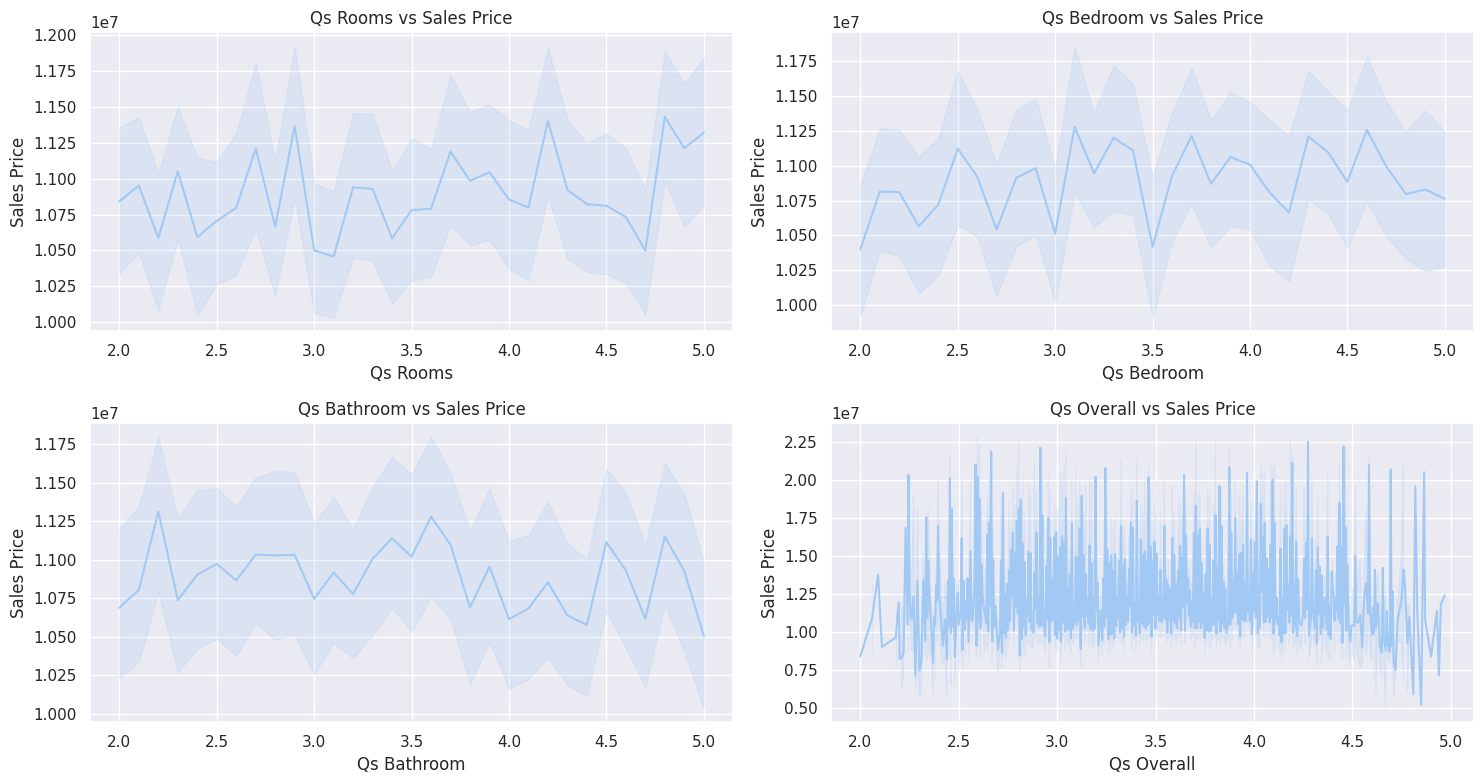

In [63]:
plt.figure(figsize=(15,8))

plt.subplot(221)
sns.lineplot(df['qs_rooms'],df['sales_price'])
plt.xlabel('Qs Rooms')
plt.ylabel('Sales Price')
plt.title('Qs Rooms vs Sales Price')

plt.subplot(222)
sns.lineplot(df['qs_bedroom'],df['sales_price'])
plt.xlabel('Qs Bedroom')
plt.ylabel('Sales Price')
plt.title('Qs Bedroom vs Sales Price')

plt.subplot(223)
sns.lineplot(df['qs_bathroom'],df['sales_price'])
plt.xlabel('Qs Bathroom')
plt.ylabel('Sales Price')
plt.title('Qs Bathroom vs Sales Price')

plt.subplot(224)
sns.lineplot(df['qs_overall'],df['sales_price'])
plt.xlabel('Qs Overall')
plt.ylabel('Sales Price')
plt.title('Qs Overall vs Sales Price')

plt.tight_layout()

<pre>Interpretations :
From the above scatterplots we can clearly observe that none of the plots exihibits Linear Relationship with the
Target Variable i.e Sales_Price.

In [64]:
del df['qs_rooms']
del df['qs_overall']
del df['qs_bathroom']
del df['qs_bedroom']
del df['dist_mainroad']
del df['sale_cond']
del df['utility_avail']

## Encoding Categorical Variables

In [65]:
df['area'] = df['area'].map({'Karapakkam':0,'Adyar':1,'Chrompet':2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6})
df['street'] = df['street'].map({'No Access':0,'Paved':1,'Gravel':2})
df['mzzone'] = df['mzzone'].map({'A':0,'C':1,'I':2,'RH':4,'RL':5,'RM':6})
df['park_facil'] = df['park_facil'].map({'No':0,'Yes':1})
df = pd.get_dummies(df, columns = ['buildtype'])

In [66]:
df.head()

,area,int_sqft,n_bedroom,n_bathroom,n_room,park_facil,street,mzzone,sales_price,house_age,buildtype_Commercial,buildtype_House,buildtype_Others
0,0,1004,1,1,3,1,1,0,7600000,44,True,False,False
1,5,1986,2,1,5,0,2,4,21717770,11,True,False,False
2,1,909,1,1,3,1,2,5,13159200,20,True,False,False
3,3,1855,3,2,5,0,1,2,9630290,22,False,False,True
4,0,1226,1,1,3,1,2,1,7406250,30,False,False,True


## Splitting the data into input data and output data

In [67]:
X = df.drop('sales_price',axis=1)
y = df['sales_price']

In [68]:
X

,area,int_sqft,n_bedroom,n_bathroom,n_room,park_facil,street,mzzone,house_age,buildtype_Commercial,buildtype_House,buildtype_Others
0,0,1004,1,1,3,1,1,0,44,True,False,False
1,5,1986,2,1,5,0,2,4,11,True,False,False
2,1,909,1,1,3,1,2,5,20,True,False,False
3,3,1855,3,2,5,0,1,2,22,False,False,True
4,0,1226,1,1,3,1,2,1,30,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,1,1,2,0,0,6,49,False,False,True
7105,3,1897,3,2,5,1,0,4,9,False,False,True
7106,3,1614,2,1,4,0,2,2,28,False,True,False
7107,0,787,1,1,2,1,1,5,32,True,False,False


In [69]:
y

0        7600000
1       21717770
2       13159200
3        9630290
4        7406250
          ...   
7104     5353000
7105    10818480
7106     8351410
7107     8507000
7108     9976480
Name: sales_price, Length: 7109, dtype: int64

In [70]:
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=70)

In [71]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5687, 12) (1422, 12) (5687,) (1422,)


In [72]:
X_train

,area,int_sqft,n_bedroom,n_bathroom,n_room,park_facil,street,mzzone,house_age,buildtype_Commercial,buildtype_House,buildtype_Others
3922,4,1483,2,1,4,0,1,5,19,False,True,False
5144,2,844,1,1,3,1,2,6,21,False,False,True
4335,2,1219,2,1,4,0,0,4,19,True,False,False
2398,0,1170,1,1,3,1,1,1,41,False,True,False
1434,4,1380,2,1,4,0,2,4,28,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5179,2,932,1,1,3,0,1,5,28,False,True,False
1340,2,917,1,1,3,0,0,5,8,False,True,False
3864,6,1952,2,1,5,1,1,6,45,False,True,False
5234,6,1881,2,1,5,1,2,6,19,True,False,False


##**12.Building Machine Learning Model**

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

###**12.1 Linear regression**

In [74]:
from sklearn.linear_model import LinearRegression #import
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train,y_train) #fit - all magic
print(linear_model.predict(X_test))     #predict
print(y_test)

[ 9053405.111224   13854806.71932036  6368912.73205697 ...
  7091442.8088644   8308849.42232401  8873629.53962383]
3714     9574950
2955    13606900
3079     7018200
6425    13531290
6445    13027180
          ...   
2968    14459960
3037     9510440
3051     8062500
3754     9952510
3369     8936650
Name: sales_price, Length: 1422, dtype: int64


In [75]:
linear_model.score(X_test, y_test)

0.9188357890536186

In [76]:
from sklearn.model_selection import cross_val_score
# synatx : cross_val_score(model, fts_train, target_train, bins).mean()
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=10).mean()
cross_val_linear_model

0.9180614998747425

###**12.2 K Nearest Neighbor Regression**

####**12.2.1 Choosing the best K(neighbor) Value**

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_values=np.arange(1,50)
cross_val_knn=[]
for k in knn_values:
  knn_regressor=KNeighborsRegressor(n_neighbors=k)
  knn_regressor.fit(X_train_scaled,y_train)
  print("K value : ", k, " train score : ", knn_regressor.score(X_train_scaled,y_train)  ,"cross_val_score : ", cross_val_score(knn_regressor,X_train_scaled,y_train,cv = 10).mean())
  cross_val_knn.append(cross_val_score(knn_regressor,X_train_scaled,y_train,cv = 10).mean())

K value :  1  train score :  0.9999964394617202 cross_val_score :  0.9554007628135764
K value :  2  train score :  0.9895988717301146 cross_val_score :  0.9628321112778753
K value :  3  train score :  0.9843471706216682 cross_val_score :  0.9636016454186975
K value :  4  train score :  0.9805732744890845 cross_val_score :  0.9632361358771864
K value :  5  train score :  0.9778136269344865 cross_val_score :  0.9630497105234749
K value :  6  train score :  0.9754846528505059 cross_val_score :  0.9627080815795207
K value :  7  train score :  0.9738107998896671 cross_val_score :  0.9621257488614802
K value :  8  train score :  0.9722551335190754 cross_val_score :  0.9613181563209643
K value :  9  train score :  0.9710153690435336 cross_val_score :  0.9604075437151461
K value :  10  train score :  0.9698453267525436 cross_val_score :  0.9597015729101253
K value :  11  train score :  0.9684733002061665 cross_val_score :  0.9588899483141743
K value :  12  train score :  0.9673411278472177 cro

In [78]:
cross_val_knn_regressor=max(cross_val_knn)

In [79]:
print("The best K-Value is 3 and Cross_val_score is",cross_val_knn_regressor )

The best K-Value is 3 and Cross_val_score is 0.9636016454186975


####**12.2.2 Implementing K Nearest Neighbor Regression**

In [80]:
knn_regressor=KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train_scaled,y_train)


KNeighborsRegressor(n_neighbors=3)

In [81]:
cross_val_knn_regressor=cross_val_score(knn_regressor,X_train_scaled,y_train,cv=15).mean()
cross_val_knn_regressor

0.9642163426542222

###**12.3 Decision Tree Regression**

####**12.3.1 Choosing the best of depth Value**

In [82]:
from sklearn.tree import DecisionTreeRegressor

max_depth=np.arange(1,20)
cross_val_dt=[]
for d in max_depth:
  dt_regressor= DecisionTreeRegressor(max_depth=d, random_state=0)
  dt_regressor.fit(X_train,y_train)
  print("Depth : ", d, " train Score  : ", dt_regressor.score(X_train,y_train), "cross_val_score : ", cross_val_score(dt_regressor,X_train,y_train,cv = 10).mean())
  cross_val_dt.append(cross_val_score(dt_regressor,X_train,y_train,cv = 10).mean())



Depth :  1  train Score  :  0.36469532366282975 cross_val_score :  0.36338762104898076
Depth :  2  train Score  :  0.6851864361873672 cross_val_score :  0.6841254041470958
Depth :  3  train Score  :  0.8059138455015753 cross_val_score :  0.804870076081903
Depth :  4  train Score  :  0.8880433266342693 cross_val_score :  0.8844383679340944
Depth :  5  train Score  :  0.9229691020685638 cross_val_score :  0.9175376035047395
Depth :  6  train Score  :  0.9442110799931962 cross_val_score :  0.9378782403551191
Depth :  7  train Score  :  0.9602983589768224 cross_val_score :  0.9502880315990202
Depth :  8  train Score  :  0.9727439411902364 cross_val_score :  0.9606780948250467
Depth :  9  train Score  :  0.9823778587310926 cross_val_score :  0.9678297131173469
Depth :  10  train Score  :  0.9890889861755132 cross_val_score :  0.9713089204084137
Depth :  11  train Score  :  0.9935587505584195 cross_val_score :  0.9727809444071178
Depth :  12  train Score  :  0.9966541519953485 cross_val_scor

In [83]:
cross_val_dt_regressor=max(cross_val_dt)

In [84]:
print("The best depth is 14 and Cross_val_score is:",cross_val_dt_regressor)

The best depth is 14 and Cross_val_score is: 0.9738334559091694


####**12.3.2 Implementing Decision Tree Regression**

In [85]:
dt_regressor=DecisionTreeRegressor(max_depth=14, random_state=0)
dt_regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=14, random_state=0)

In [86]:
cross_val_dt_regressor=cross_val_score(dt_regressor,X_train,y_train,cv=10).mean()
cross_val_dt_regressor

0.9738334559091694

In [87]:
ftImp = list(zip(dt_regressor.feature_importances_, df.columns[:-1]))
imp = pd.DataFrame(ftImp, columns = ["Importance","Feature"])
imp.sort_values("Importance",ascending = False,inplace=True)
imp

,Importance,Feature
0,0.486267,area
9,0.320720,house_age
1,0.114230,int_sqft
7,0.038386,mzzone
5,0.015471,park_facil
6,0.011227,street
8,0.006415,sales_price
11,0.003873,buildtype_House
10,0.001529,buildtype_Commercial
2,0.000943,n_bedroom


###**12.4 Random Forest Regression**

####**12.4.1 Choosing the best depth value**

In [88]:
from sklearn.ensemble import RandomForestRegressor

max_depth=np.array([2,4,8,10,11,12,13,15,18,20])
cross_val_rf=[]
for d in max_depth:
  rf_regressor=RandomForestRegressor(max_depth=d, random_state=0)
  rf_regressor.fit(X_train,y_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())
  cross_val_rf.append(cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())

Depth :  2 cross_val_score :  0.6834147776589349
Depth :  4 cross_val_score :  0.8930501283946746
Depth :  8 cross_val_score :  0.9759538233351074
Depth :  10 cross_val_score :  0.985559595776414
Depth :  11 cross_val_score :  0.987302546042944
Depth :  12 cross_val_score :  0.9880371797964778
Depth :  13 cross_val_score :  0.9883844697084055
Depth :  15 cross_val_score :  0.9885369161278869
Depth :  18 cross_val_score :  0.9885366098785694
Depth :  20 cross_val_score :  0.9885236692073132


In [89]:
cross_val_rf_regressor=max(cross_val_rf)

In [90]:
print("The best depth is 20 and Cross_val_score is:",cross_val_rf_regressor)

The best depth is 20 and Cross_val_score is: 0.9885369161278869


####**12.4.2 Implementing Random Forest Regression**

In [91]:
rf_regressor=RandomForestRegressor(max_depth=20, random_state=0)
rf_regressor.fit(X_train,y_train)


RandomForestRegressor(max_depth=20, random_state=0)

In [92]:
cross_val_rf_regressor=cross_val_score(rf_regressor,X_train,y_train,cv=15).mean()
cross_val_rf_regressor

0.9885236692073132

###**12.6 Extreme Gradient Boosting Regression**

####**12.6.1 Choosing the best Learning Rate**

In [93]:
import xgboost as xgb

cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.1,0.2,0.25,0.3]:
  xgb_regressor= xgb.XGBRegressor(learning_rate = lr,n_estimators=100)
  xgb_regressor.fit(X_train,y_train)
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())
  cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())

Learning rate :  0.01 cross_val_score: 0.8215468947731792
Learning rate :  0.05 cross_val_score: 0.9905952531133768
Learning rate :  0.08 cross_val_score: 0.9930679043071855
Learning rate :  0.1 cross_val_score: 0.9934563073120489
Learning rate :  0.2 cross_val_score: 0.9931107038519582
Learning rate :  0.25 cross_val_score: 0.9929786460483536
Learning rate :  0.3 cross_val_score: 0.9925723065642661


In [94]:
cross_val_xgb_regressor=max(cross_val_xgb)

In [95]:
print("The best Learning rate is 0.1 and Cross_val_score is:",cross_val_xgb_regressor)


The best Learning rate is 0.1 and Cross_val_score is: 0.9934563073120489


####**12.6.2 Implementing Extreme Gradient Boosting Regression**

In [109]:
  xgb_regressor= xgb.XGBRegressor(learning_rate =0.1,n_estimators=100) # initialise the model
  xgb_regressor.fit(X_train,y_train) #train the model


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [97]:
cross_val_xgb_regressor=cross_val_score(xgb_regressor,X_train,y_train,cv=15).mean()
cross_val_xgb_regressor

0.9934563073120489

###**12.7 Cross-Validation Score for Machine-Learning Models**

In [98]:
print("Cross Validation Score for Linear Regression Model:",cross_val_linear_model)
print("Cross Validation Score for K-Nearest Neighbors Regression Model:",cross_val_knn_regressor)
print("Cross Validation Score for Decision Tree Regression Model: ",cross_val_dt_regressor)
print("Cross Validation Score for Random Forest Regression Model: ",cross_val_rf_regressor)
print("Cross Validation Score for Extreme-Gradient Boosting Regression Model: ",cross_val_xgb_regressor)

Cross Validation Score for Linear Regression Model: 0.9180614998747425
Cross Validation Score for K-Nearest Neighbors Regression Model: 0.9642163426542222
Cross Validation Score for Decision Tree Regression Model:  0.9738334559091694
Cross Validation Score for Random Forest Regression Model:  0.9885236692073132
Cross Validation Score for Extreme-Gradient Boosting Regression Model:  0.9934563073120489


###**12.8 R2 Score for Machine-Learning Models**

In [99]:
from sklearn.metrics import r2_score

In [100]:
y_pred_lr=linear_model.predict(X_test)
y_pred_knn=knn_regressor.predict(X_test)
y_pred_dt= dt_regressor.predict(X_test)
y_pred_rf=rf_regressor.predict(X_test)
y_pred_xgb=xgb_regressor.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [101]:
R2_score_lr=r2_score(y_test,y_pred_lr)
R2_score_knn=r2_score(y_test,y_pred_knn)
R2_score_dt=r2_score(y_test,y_pred_dt)
R2_score_rf=r2_score(y_test,y_pred_rf)
R2_score_xgb=r2_score(y_test,y_pred_xgb)

In [102]:
print("R2 Score for Linear Regression Model:",R2_score_lr)
print("R2 Score for K-Nearest Neighbors Regression Model:",R2_score_knn)
print("R2 Score for Decision Tree Regression Model: ",R2_score_dt)
print("R2 Score for Random Forest Regression Model: ",R2_score_rf)
print("R2 Score for Extreme-Gradient Boosting Regression Model: ",R2_score_xgb)

R2 Score for Linear Regression Model: 0.9188357890536186
R2 Score for K-Nearest Neighbors Regression Model: -0.7860597736223853
R2 Score for Decision Tree Regression Model:  0.974105736759212
R2 Score for Random Forest Regression Model:  0.9889676812795072
R2 Score for Extreme-Gradient Boosting Regression Model:  0.9935147241106336


##**13. Suggestion to Sellers and buyers**-Solving problem statements based on Feature Importance

In [103]:
xgb_regressor.feature_importances_

array([2.4464893e-01, 2.0865284e-02, 8.2747594e-02, 1.3686639e-02,
       9.3363754e-02, 1.0821610e-02, 8.0767516e-03, 2.0732809e-02,
       1.1544041e-03, 4.9375796e-01, 1.0067456e-02, 7.6907469e-05],
      dtype=float32)

In [104]:
df.columns

Index(['area', 'int_sqft', 'n_bedroom', 'n_bathroom', 'n_room', 'park_facil',
       'street', 'mzzone', 'sales_price', 'house_age', 'buildtype_Commercial',
       'buildtype_House', 'buildtype_Others'],
      dtype='object')

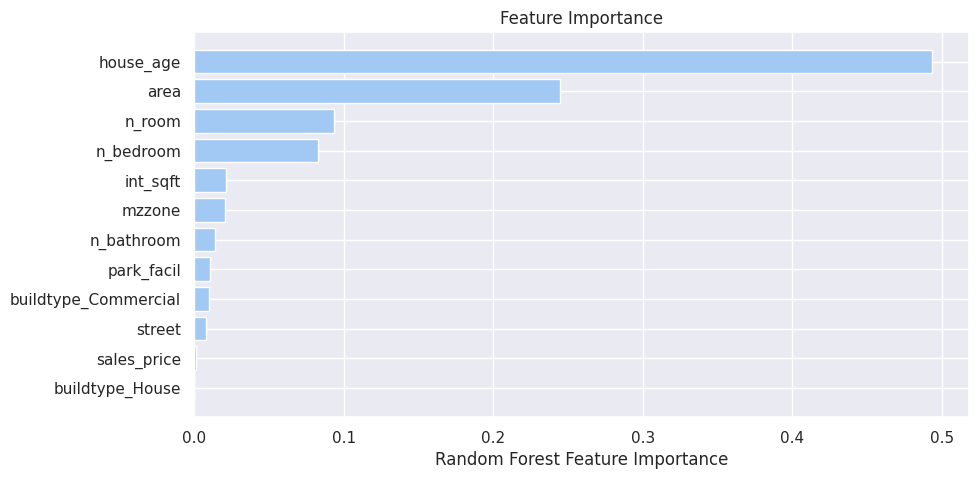

In [105]:
sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()

In [106]:
xgb_regressor.feature_importances_

array([2.4464893e-01, 2.0865284e-02, 8.2747594e-02, 1.3686639e-02,
       9.3363754e-02, 1.0821610e-02, 8.0767516e-03, 2.0732809e-02,
       1.1544041e-03, 4.9375796e-01, 1.0067456e-02, 7.6907469e-05],
      dtype=float32)

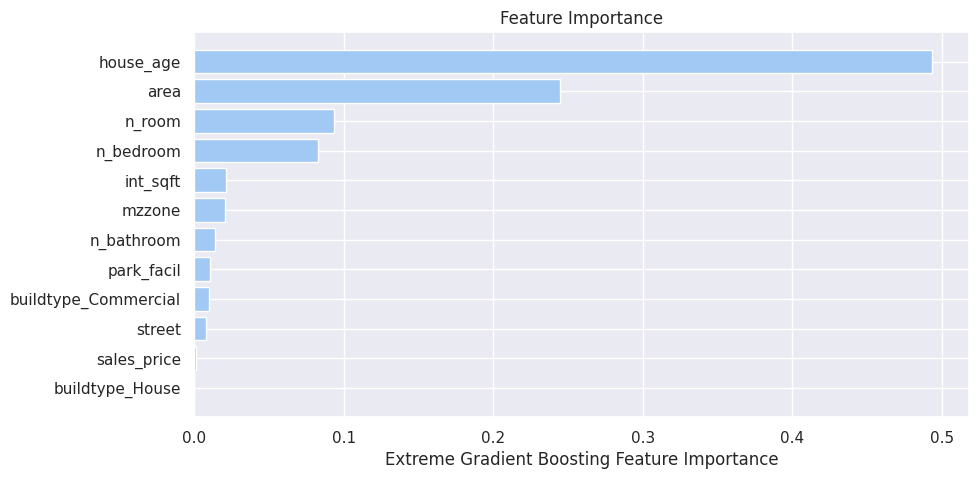

In [107]:

sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("Extreme Gradient Boosting Feature Importance")
plt.title("Feature Importance")
plt.show()

**Suggestion to Sellers**

Based on the **feature importance** given by Best Machine Learning
Algorithm(**Extreme Gradient Boosting**)-Sellers should Focus on the features of order given below to build homes that fetch more money:



1.   Age of the building,
2.   Area(location) of the building,
3.   No. of Rooms present,
4.   Build_type(Commercial,House etc..)-Commercial is best,
5.   MZ Zone,
6.   Parking Facility,
7.   No. of Bedrooms,
8.   Area(SQFT) of the building,
9.   No. of Bathrooms,
10.  Street(Paved, Gravel, No access, etc.) of the building,
11.  Sales Condition,
12.  Utility available.